In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### <font color='#00d2d3'> Importer les packages

In [2]:
# Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords') # Télécharger le package stopwords
nltk.download('wordnet')
from nltk.corpus import stopwords # Importer le package stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### <font color='#00d2d3'> Importer et lire les données

In [3]:
# Importation des données Tweets_data
df = pd.read_csv("/content/drive/MyDrive/NLP_docs_4/Assignment 1/french_tweets.csv")
# Afficher les données
df

,label,text
0,0,"- Awww, c'est un bummer. Tu devrais avoir davi..."
1,0,Est contrarié qu'il ne puisse pas mettre à jou...
2,0,J'ai plongé plusieurs fois pour la balle. A ré...
3,0,Tout mon corps a des démangeaisons et comme si...
4,0,"Non, il ne se comporte pas du tout. je suis en..."
...,...,...
1526719,1,"Oui, cela fonctionne mieux que de l'attendre à..."
1526720,1,Je viens de me réveiller. Ne pas avoir d'école...
1526721,1,Thewdb.com - très cool d'entendre les vieilles...
1526722,1,Êtes-vous prêt pour votre mojo makeover? Deman...


In [4]:
# Dimension des données
df.shape

(1526724, 2)

### <font color='#00d2d3'> Pré-traitement des données

In [5]:
# Nombre d'observations dans chaque classe
df.label.value_counts()

0    771604
1    755120
Name: label, dtype: int64

In [6]:
# Définir le nombre d'échantillons à extraire pour chaque label
samples_per_label = 25000

# Utilisation de groupby pour regrouper par label et sample pour extraire les échantillons
df = df.groupby('label').apply(lambda x: x.sample(samples_per_label)).reset_index(drop=True)

# Nombre d'observations dans chaque classe
print(df.label.value_counts())


0    25000
1    25000
Name: label, dtype: int64


0 : Négatif
1 : Positif

In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50000 non-null  int64 
 1   text    50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


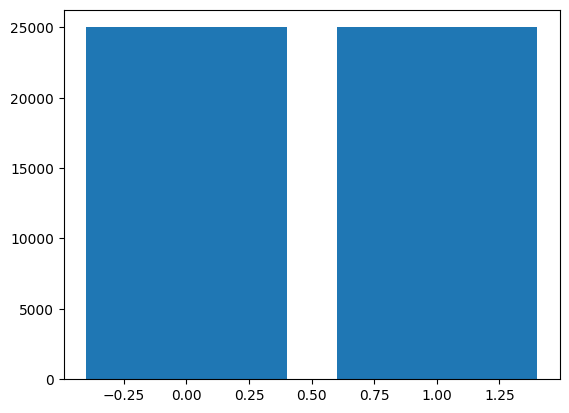

In [8]:
# Bar plot des nombres d'observations dans chaque classe
plt.bar(df.label.value_counts().index, df.label.value_counts().values)
plt.xticks()
plt.show()

#### <font color='#00d2d3'> Pré-traitement des données textuelles

In [9]:
# Afficher la première ligne de la colonne tweet
df["text"][0]

'Oui, mais je ne peux pas le trouver à partir des paramètres'

In [10]:
# Afficher la deuxième ligne de la colonne tweet
df["text"][1]

"Souhaitant n'avoir pas de travail qui me demande de travailler une soirée de lundi"

In [11]:
df

,label,text
0,0,"Oui, mais je ne peux pas le trouver à partir d..."
1,0,Souhaitant n'avoir pas de travail qui me deman...
2,0,"Non ""le service postal"" sur Twitter....."
3,0,Tous les billets ont été terminés le week-end!...
4,0,Qu'est-il arrivé? Avez-vous déjà entendu le no...
...,...,...
49995,1,Le temps de se doucher et de ranger puis de so...
49996,1,"Il est important de soumettre des amis, faites..."
49997,1,Où es-tu
49998,1,Dick cheney est soudainement un mariage pro-ga...


###### <font color='#1dd1a1'> Commencer le nettoyage des tweets


In [12]:
# Fonction supprimant les links
def remove_links(tweet):
  tweet = re.sub(r"https?://\S+","", tweet)
  return tweet

In [13]:
# Exemple
tweet ='The urls of my webpages is http://analysis.com https://abdoul.com'
tweet = remove_links(tweet)
tweet

'The urls of my webpages is  '

In [14]:
# Fonction supprimant les @username
def remove_users(tweet):
  tweet = re.sub(r"@[\w\-._]+", "", tweet)
  return tweet

In [15]:
# Exemple
tweet ='My username is @projet_NLP'
tweet = remove_users(tweet)
tweet

'My username is '

In [16]:
# Supprimer les adresses emails
def email_address(tweet):
  tweet = re.sub(r"[\w\-._]+@[\w\-._]+", "", tweet)
  return tweet

In [17]:
# Exemple
tweet ='My email adress is the following : institut_dakar07@gmail.com'
tweet = email_address(tweet)
tweet

'My email adress is the following : '

In [18]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.2 MB/s eta 0:00:00


In [19]:
import contractions
# Fonction étendant les contractions
def contraction(tweet):
    expanded_all = []
    for word in tweet.split():
        expanded_all.append(contractions.fix(word)) # utiliser la fonction fix de contractions

    expand = ' '.join(expanded_all)
    return expand

In [20]:
# Exemple
tweet ="That's the right thing to do"
tweet = contraction(tweet)
tweet

'That is the right thing to do'

In [21]:
# Supprimer html caractères
def clean_html(tweet):
  tweet = re.sub(r"&\w+", "", tweet)
  return tweet

In [22]:
# Exemple
tweet ='#World What a shame &amp'
tweet = clean_html(tweet)
tweet

'#World What a shame '

In [23]:
# Remplacer tout ce qui n'est chaines de caractères alphabétiques et espace par ' '
def alpha_b(tweet):
  tweet = re.sub(r"[^a-zA-Z\s]+", " ", tweet)
  return tweet

In [24]:
# Exemple
tweet = 'My year of birth is 2050 #happy'
tweet = alpha_b(tweet)
tweet

'My year of birth is    happy'

In [25]:
# Fonction remplaçant les espaces multiples et convertissant majuscules en minuscules
def lower(tweet):
  tweet = re.sub(r"\s{2,}", " ", tweet)
  return tweet.lower()

In [26]:
# Supprimer les espaces en début et fin de tweet
def clean_space(tweet):
  tweet = re.sub(r"^\s|\s$", "", tweet)

In [27]:
tweet = ' My year of birth is 2050 #happy '
tweet = clean_space(tweet)
tweet

In [28]:
# Fonction supprimant les stopwords
def remove_stopwords(text):
    Stopwords = stopwords.words('french')
    #tweet= " ".join([word for word in text.split() if word not in Stopwords])
    tweet= " ".join([word for word in text.split() if word not in Stopwords])
    return tweet

In [29]:
# Exemple
tweet = "j'aimerai être un grand homme"
tweet = remove_stopwords(tweet)
tweet

"j'aimerai être grand homme"

In [30]:
! pip install spacy
! python -m spacy download fr_core_news_sm


2023-11-30 14:21:10.466197: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 14:21:10.466252: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 14:21:10.466290: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 14:21:10.477413: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-30 14:21:12.527138: W tensorflow/c

In [31]:
import spacy

nlp = spacy.load("fr_core_news_sm")

def lem_sw(tweet):
    doc = nlp(tweet)
    lemmatized_words = [token.lemma_ for token in doc]
    lemmatized_tweet = " ".join(lemmatized_words)
    return lemmatized_tweet

In [32]:
tweet = 'Je suis un étudiant international'
tweet = lem_sw(tweet)
tweet

'je être un étudiant international'

###### <font color='#1dd1a1'> Appliquer les différentes fonctions sur les tweets



In [33]:
# Appliquer la fonction remove_users
df["new_tweet"] = df.text.apply(func = remove_users)
# Appliquer la fonction remove_links
df["new_tweet"] = df.new_tweet.apply(func = remove_links)
# Appliquer la fonction email_address
df["new_tweet"] = df.new_tweet.apply(func = email_address)
# Appliquer la fonction remove_contraction
df["new_tweet"] = df.new_tweet.apply(func = contraction)
# Appliquer la fonction clean_html
df["new_tweet"] = df.new_tweet.apply(func = clean_html)
# Appliquer la fonction alpha_b
df["new_tweet"] = df.new_tweet.apply(func = alpha_b)
# Appliquer la fonction lower
df["new_tweet"] = df.new_tweet.apply(func = lower)
# Appliquer la fonction clean_space
#df["new_tweet"] = df.new_tweet.apply(func = clean_space)
# Appliquer la fonction remove_stopwords
df["new_tweet"] = df.new_tweet.apply(func = remove_stopwords)
# Appliquer la fonction lem_sw
df["new_tweet"] = df.new_tweet.apply(func = lem_sw)

In [34]:
# Afficher df
df

,label,text,new_tweet
0,0,"Oui, mais je ne peux pas le trouver à partir d...",oui peux trouver partir param tre
1,0,Souhaitant n'avoir pas de travail qui me deman...,souhaiter avoir travail demande travailler soi...
2,0,"Non ""le service postal"" sur Twitter.....",non service postal twitter
3,0,Tous les billets ont été terminés le week-end!...,tout billet termin week end pardon
4,0,Qu'est-il arrivé? Avez-vous déjà entendu le no...,arriv entendre nouveau alb auditif soso good lt
...,...,...,...
49995,1,Le temps de se doucher et de ranger puis de so...,temps doucher ranger pouvoir sortir jeuner ami...
49996,1,"Il est important de soumettre des amis, faites...",important soumettr ami fait attention demander...
49997,1,Où es-tu,o
49998,1,Dick cheney est soudainement un mariage pro-ga...,dick cheney soudainement mariage pro gay si bl...


### <font color='#00d2d3'> Vectorisation

In [35]:
# Importer les packages
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [36]:
# Nombre de mots
voc_size = len(set(" ".join(df.new_tweet).split()))
# Initialiser le modèle Tokenizer
tokenizer = Tokenizer(num_words=voc_size, split=' ')
# Entrainer les données
tokenizer.fit_on_texts(df['new_tweet'].values)
# Vectoriser
X_token = tokenizer.texts_to_sequences(df['new_tweet'].values)
# Padding
X = pad_sequences(X_token)

In [37]:
X

array([[   0,    0,    0, ...,  147, 3231,   11],
       [   0,    0,    0, ...,   47,    7,  243],
       [   0,    0,    0, ...,  556, 3058,   62],
       ...,
       [   0,    0,    0, ...,    0,    0,   53],
       [   0,    0,    0, ...,    1, 3391,   34],
       [   0,    0,    0, ...,  526, 1092,    2]], dtype=int32)

In [38]:
# données train, test et val
from sklearn.model_selection import train_test_split
y = df.label.values
x_train, x_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)

In [39]:
x_train.shape, x_val.shape, x_test.shape, len(y), len(X)

((40000, 28), (5000, 28), (5000, 28), 50000, 50000)

In [40]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
x_val = x_val.astype('float32')
y_val = y_val.astype('float32')

In [41]:
from keras.preprocessing.sequence import pad_sequences

# Assurez-vous que vos séquences ont la même longueur
max_sequence_length = 41
x_train_padded = pad_sequences(x_train, maxlen=max_sequence_length)
x_test_padded = pad_sequences(x_test, maxlen=max_sequence_length)
x_val_padded = pad_sequences(x_val, maxlen=max_sequence_length)

# Vérifiez à nouveau les formes
print("Nouvelle forme de x_train:", x_train_padded.shape)
print("Forme de y_train:", y_train.shape)


Nouvelle forme de x_train: (40000, 41)
Forme de y_train: (40000,)


In [42]:
x_train =  x_train_padded
x_test =  x_test_padded
x_val =  x_val_padded

In [43]:
x_train.shape, x_test.shape

((40000, 41), (5000, 41))

In [44]:
print(f'Shapes after correction:')
print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_val: {x_val.shape}, y_val: {y_val.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')


Shapes after correction:
x_train: (40000, 41), y_train: (40000,)
x_val: (5000, 41), y_val: (5000,)
x_test: (5000, 41), y_test: (5000,)


### <font color='#00d2d3'> Sentiment Analysis avec LSTM Bi-directional LSTM GRU Bi-directional GRU

In [45]:
# modèles GRU ,Bidirectionnal GRU ,LSTM , Bidirectionnal LSTM

from keras.models import Sequential
from keras.layers import Embedding, GRU, Bidirectional, LSTM, Dense, Dropout

# Paramètres communs
embedding_dim = 100
max_sequence_length = 41
dropout_rate = 0.4

# Définir les modèles
def build_gru_model():
    model = Sequential()
    model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(GRU(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(GRU(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_bidirectional_gru_model():
    model = Sequential()
    model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(Bidirectional(GRU(64, activation='relu')))
    model.add(Dropout(dropout_rate))
    model.add(Bidirectional(GRU(32, activation='relu')))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(LSTM(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_bidirectional_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(Bidirectional(LSTM(64, activation='relu')))
    model.add(Dropout(dropout_rate))
    model.add(Bidirectional(LSTM(32, activation='relu')))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [46]:
# Assurez-vous que vos données d'entraînement ont la bonne forme
x_train.shape, x_val.shape


((40000, 41), (5000, 41))

In [47]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.4 MB/s eta 0:00:00


In [48]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Bidirectional, LSTM, Dense, Dropout
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Paramètres communs
voc_size = 40000
embedding_dim = 100
max_sequence_length = 41
epochs = 10
batch_size = 32

# Fonction de construction du modèle avec Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=max_sequence_length))

    # Choix du type de couche récurrente
    rnn_type = hp.Choice('rnn_type', values=['gru', 'bidirectional_gru', 'lstm', 'bidirectional_lstm'])

    # Ajoutez la couche récurrente spécifiée avec un Dropout ajustable
    if rnn_type == 'gru':
        model.add(GRU(units=hp.Int('gru_units', min_value=32, max_value=256, step=32), activation='relu'))
    elif rnn_type == 'bidirectional_gru':
        model.add(Bidirectional(GRU(units=hp.Int('bidirectional_gru_units', min_value=32, max_value=256, step=32), activation='relu')))
    elif rnn_type == 'lstm':
        model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=256, step=32), activation='relu'))
    elif rnn_type == 'bidirectional_lstm':
        model.add(Bidirectional(LSTM(units=hp.Int('bidirectional_lstm_units', min_value=32, max_value=256, step=32), activation='relu')))

    # Ajoutez une couche Dropout ajustable
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    # Compilez le modèle avec l'optimiseur et la fonction de perte ajustables
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Instanciez le tuner
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,
                     directory='my_tuner_dir',
                     project_name='sentiment_analysis')

# Recherche d'hyperparamètres
tuner.search(x_train, y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_data=(x_val, y_val))

# Obtenez le meilleur modèle
best_model = tuner.get_best_models(num_models=1)[0]

# Résumé des résultats de la recherche
tuner.results_summary()

Trial 5 Complete [00h 17m 24s]
val_accuracy: 0.7531999945640564

Best val_accuracy So Far: 0.7562000155448914
Total elapsed time: 01h 14m 35s


Results summary
Results in my_tuner_dir/sentiment_analysis
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
rnn_type: gru
gru_units: 32
dropout_rate: 0.2
optimizer: rmsprop
lstm_units: 128
bidirectional_lstm_units: 128
Score: 0.7562000155448914

Trial 1 summary
Hyperparameters:
rnn_type: bidirectional_lstm
gru_units: 128
dropout_rate: 0.30000000000000004
optimizer: adam
lstm_units: 128
bidirectional_lstm_units: 32
Score: 0.753600001335144

Trial 4 summary
Hyperparameters:
rnn_type: bidirectional_lstm
gru_units: 256
dropout_rate: 0.4
optimizer: rmsprop
lstm_units: 160
bidirectional_lstm_units: 192
Score: 0.7531999945640564

Trial 2 summary
Hyperparameters:
rnn_type: bidirectional_lstm
gru_units: 64
dropout_rate: 0.30000000000000004
optimizer: rmsprop
lstm_units: 224
bidirectional_lstm_units: 160
Score: 0.7509999871253967

Trial 0 summary
Hyperparameters:
rnn_type: lstm
gru_units: 160
dropout_rate: 0.2
optimizer: adam
lstm_units: 32

###### <font color='#1dd1a1'> Test le modèle

In [49]:
# Train the best model
best_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss}')

# Save the trained model if needed
best_model.save('best_model_french.h5')

Epoch 1/10
1250/1250 [==============================] - 90s 71ms/step - loss: 0.4394 - accuracy: 0.8020 - val_loss: 0.5166 - val_accuracy: 0.7528
Epoch 2/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.4064 - accuracy: 0.8224 - val_loss: 0.5329 - val_accuracy: 0.7484
Epoch 3/10
1250/1250 [==============================] - 64s 52ms/step - loss: 0.3776 - accuracy: 0.8391 - val_loss: 0.5515 - val_accuracy: 0.7438
Epoch 4/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.3557 - accuracy: 0.8515 - val_loss: 0.5508 - val_accuracy: 0.7438
Epoch 5/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.3338 - accuracy: 0.8623 - val_loss: 0.5741 - val_accuracy: 0.7378
Epoch 6/10
1250/1250 [==============================] - 62s 49ms/step - loss: 0.3157 - accuracy: 0.8721 - val_loss: 0.6131 - val_accuracy: 0.7330
Epoch 7/10
1250/1250 [==============================] - 61s 49ms/step - loss: 0.2987 - accuracy: 0.8797 - val_loss: 0.6236 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming x_val is your validation data and y_val is the corresponding true labels
predictions = best_model.predict(x_val)

# Assuming your predictions are probabilities, you might want to convert them to binary predictions
binary_predictions = (predictions > 0.5).astype(int)

# Compare predictions to true labels
accuracy = accuracy_score(y_val, binary_predictions)
precision = precision_score(y_val, binary_predictions)
recall = recall_score(y_val, binary_predictions)
f1 = f1_score(y_val, binary_predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')



157/157 [==============================] - 1s 9ms/step
Accuracy: 71.80%
Precision: 73.23%
Recall: 68.22%
F1 Score: 70.64%


In [53]:
tweet = df['new_tweet'][:3]

# Vectoriser le tweet
twt = tokenizer.texts_to_sequences(tweet)

# Padding
twt = pad_sequences(twt, maxlen=x_train_padded.shape[1])

# Prédictions les labels
y_pred = best_model.predict(twt)

# Arrondir les valeurs
y_pred = np.round(y_pred)

# Afficher sentiments
for i in range(3):
    sentiment = "Negative sentiment" if int(y_pred[i][0]) == 1 else "Positive sentiment"
    print(f"{tweet[i]} --------- {sentiment}")


1/1 [==============================] - 0s 97ms/step
oui peux trouver partir param tre --------- Positive sentiment
souhaiter avoir travail demande travailler soir e lundi --------- Positive sentiment
non service postal twitter --------- Negative sentiment
